## Portfolio assignment week 4

1. Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis). 

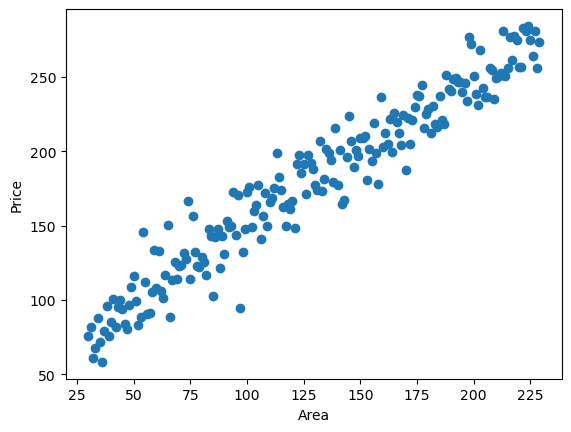

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# loading dataset
housing_data = pd.read_csv('data/housing-data.txt')
area = housing_data['size']
price = housing_data['price']

# visualising data with a scatter plot
plt.scatter(area, price)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$

2. Write a function `compute_cost` that receives a matrix `X` (of size $m \times n$), a vector `y` (of size $n \times 1$) and a vector `theta` (of size $n+1 \times 1$) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original `X`-matrix

In [136]:
def compute_cost(X, y, theta):
    # defining the number of training examples
    m = len(y)
    
    # calculating the predicted value h
    h = X.dot(theta)
    
    # calculating the cost
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    
    return J

In [137]:
# defining variables
X = housing_data['size'].values
X = X.reshape(-1, 1) 
X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
y = housing_data['price'].values
y = y.reshape(-1, 1) 
theta = np.array([0, 0])

17840.780961229346


In [196]:
# computing cost
J = compute_cost(X,y, theta)
print(f'The computed cost: {J}')

The computed cost: 640.7980102595002


When we call `compute-cost` with a value of `theta` of `[0,0]`, the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize $J(\theta)$. 

As we have discussed, the technique we are using for this is *gradient descent*: every step of this descent, we update the values of `theta` as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

Make a function `gradient_descent`, that receives the matrix `X`, the vectors `y` and `theta`, the learning curve `alpha` and a `num_iters`. In this method, performs `num_iters` steps of the gradient descent, calculating the cost $J(\theta)$ every step and storing that in a list. After the `num_iters`, this function needs to return the found value of `theta` and the list of all the costs.

In [146]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # defining the number of training examples
    m = len(y)
    
    # defining an empty list for costs to be stored in
    costs = []
    
    for i in range(num_iters):
        # calculating the predicted value h
        h = X.dot(theta)
        
        # updating theta
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta = theta - alpha * gradient

        # calculating the cost and storing it
        J = (1 / (2 * m)) * np.sum((h - y) ** 2)
        costs.append(J)
        
    return theta, costs

Create a plot of the values of $J(\theta)$ that `compute_costs` has found. Do you see a decrease in the total costs?

In [194]:
# defining variables
theta = np.array([0, 0])
theta = theta.reshape(-1, 1)
alpha = 1e-6
num_iters = 100

# computing costs
theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
print(theta)

[[1.14632162]
 [0.00825416]]


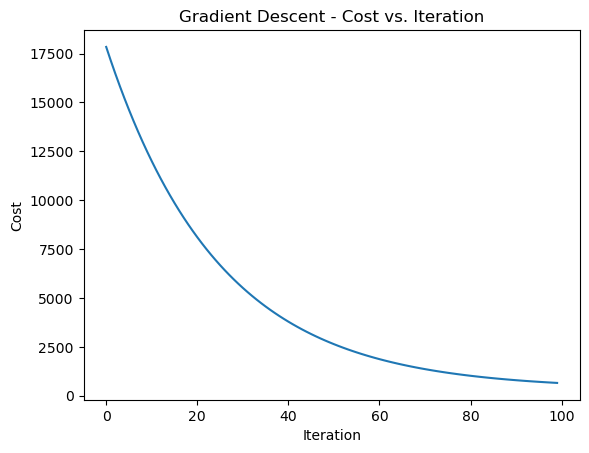

In [193]:
# plotting values of J
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent - Cost vs. Iteration')
plt.show()